## 6.5 Machine Learning Part 2

This script contains the following:
1. Importing libraries and data and renaming columns
2. Wrangling and Consistency Checking of Data
3. The elbow technique
4. k-means clustering


# Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = '/Users/amykillin/Desktop/Mark Career Foundry Data/Data Immersion/Topic 6/'

In [6]:
# Import the Dataframe

df = pd.read_excel(os.path.join(path, 'UFC Dataset', 'UFC_Complete_Sheet_for_Pandas.xlsx'))

# Wrangling and Consistency Checking of Data

In [7]:
df

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR_Landed,R_SIG_STR_Thrown,B_SIG_STR_Landed,B_SIG_STR_Thrown,R_TOTAL_STR_Landed,R_TOTAL_STR_Thrown,...,B_CTRL,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Adrian Yanez,Gustavo Lopez,2,0,41,103,23,51,41,103,...,00:00:00,KO/TKO,3,00:27:00,3 Rnd (5-5-5),Chris Tognoni,"March 20, 2021","Las Vegas, Nevada, USA",Bantamweight Bout,Adrian Yanez
1,Trevin Giles,Roman Dolidze,0,0,27,57,32,67,43,73,...,04:15:00,Decision - Unanimous,3,05:00:00,3 Rnd (5-5-5),Herb Dean,"March 20, 2021","Las Vegas, Nevada, USA",Middleweight Bout,Trevin Giles
2,Tai Tuivasa,Harry Hunsucker,1,0,14,18,2,6,14,18,...,00:00:00,KO/TKO,1,00:49:00,3 Rnd (5-5-5),Herb Dean,"March 20, 2021","Las Vegas, Nevada, USA",Heavyweight Bout,Tai Tuivasa
3,Cheyanne Buys,Montserrat Conejo,0,0,31,65,15,41,49,87,...,09:53:00,Decision - Unanimous,3,05:00:00,3 Rnd (5-5-5),Mark Smith,"March 20, 2021","Las Vegas, Nevada, USA",Women's Strawweight Bout,Montserrat Conejo
4,Marion Reneau,Macy Chiasson,0,0,30,63,51,138,59,93,...,03:48:00,Decision - Unanimous,3,05:00:00,3 Rnd (5-5-5),Mark Smith,"March 20, 2021","Las Vegas, Nevada, USA",Women's Bantamweight Bout,Macy Chiasson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,0,0,4,6,1,3,20,22,...,--,Submission,1,09:51:00,No Time Limit,John McCarthy,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Remco Pardoel
6008,Orlando Wiet,Robert Lucarelli,0,0,8,12,2,6,11,15,...,--,KO/TKO,1,02:50:00,No Time Limit,John McCarthy,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Orlando Wiet
6009,Johnny Rhodes,David Levicki,0,0,11,17,4,5,74,86,...,--,KO/TKO,1,12:13:00,No Time Limit,John McCarthy,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Johnny Rhodes
6010,Patrick Smith,Ray Wizard,0,0,1,1,1,1,1,1,...,--,Submission,1,00:58:00,No Time Limit,John McCarthy,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Patrick Smith


In [8]:
df.shape

(6012, 31)

In [9]:
df.isnull().sum()

R_fighter               0
B_fighter               0
R_KD                    0
B_KD                    0
R_SIG_STR_Landed        0
R_SIG_STR_Thrown        0
B_SIG_STR_Landed        0
B_SIG_STR_Thrown        0
R_TOTAL_STR_Landed      0
R_TOTAL_STR_Thrown      0
B_TOTAL_STR_Landed      0
B_TOTAL_STR_Thrown      0
R_TD_Secured            0
R_TD_Attempted          0
B_TD_Secured            0
B_TD_Attempted          0
R_SUB_ATT               0
B_SUB_ATT               0
R_REV                   0
B_REV                   0
R_CTRL                  0
B_CTRL                  0
win_by                  0
last_round              0
last_round_time         0
Format                  0
Referee                32
date                    0
location                0
Fight_type              0
Winner                110
dtype: int64

In [12]:
df.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR_Landed,R_SIG_STR_Thrown,B_SIG_STR_Landed,B_SIG_STR_Thrown,R_TOTAL_STR_Landed,R_TOTAL_STR_Thrown,...,B_CTRL,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Adrian Yanez,Gustavo Lopez,2,0,41,103,23,51,41,103,...,00:00:00,KO/TKO,3,00:27:00,3 Rnd (5-5-5),Chris Tognoni,"March 20, 2021","Las Vegas, Nevada, USA",Bantamweight Bout,Adrian Yanez
1,Trevin Giles,Roman Dolidze,0,0,27,57,32,67,43,73,...,04:15:00,Decision - Unanimous,3,05:00:00,3 Rnd (5-5-5),Herb Dean,"March 20, 2021","Las Vegas, Nevada, USA",Middleweight Bout,Trevin Giles
2,Tai Tuivasa,Harry Hunsucker,1,0,14,18,2,6,14,18,...,00:00:00,KO/TKO,1,00:49:00,3 Rnd (5-5-5),Herb Dean,"March 20, 2021","Las Vegas, Nevada, USA",Heavyweight Bout,Tai Tuivasa
3,Cheyanne Buys,Montserrat Conejo,0,0,31,65,15,41,49,87,...,09:53:00,Decision - Unanimous,3,05:00:00,3 Rnd (5-5-5),Mark Smith,"March 20, 2021","Las Vegas, Nevada, USA",Women's Strawweight Bout,Montserrat Conejo
4,Marion Reneau,Macy Chiasson,0,0,30,63,51,138,59,93,...,03:48:00,Decision - Unanimous,3,05:00:00,3 Rnd (5-5-5),Mark Smith,"March 20, 2021","Las Vegas, Nevada, USA",Women's Bantamweight Bout,Macy Chiasson


In [10]:
# Only interested in using the 

#knowck downs
#takedowns attempted
#takedowns secured
#submissions attempted
#Reversals

#I will extract these columns to use for the k-means

In [13]:
df['knockdowns'] = (df['B_KD']+df['R_KD'])

In [14]:
df['takedowns_attempted'] = (df['R_TD_Attempted']+df['B_TD_Attempted'])

In [16]:
df['takedowns_secured'] = (df['R_TD_Secured']+df['B_TD_Secured'])

In [17]:
df['sub_attempted'] = (df['R_SUB_ATT']+df['B_SUB_ATT'])

In [18]:
df['reversals'] = (df['R_REV']+df['B_REV'])

In [22]:
list(df)

['R_fighter',
 'B_fighter',
 'R_KD',
 'B_KD',
 'R_SIG_STR_Landed',
 'R_SIG_STR_Thrown',
 'B_SIG_STR_Landed',
 'B_SIG_STR_Thrown',
 'R_TOTAL_STR_Landed',
 'R_TOTAL_STR_Thrown',
 'B_TOTAL_STR_Landed',
 'B_TOTAL_STR_Thrown',
 'R_TD_Secured',
 'R_TD_Attempted',
 'B_TD_Secured',
 'B_TD_Attempted',
 'R_SUB_ATT',
 'B_SUB_ATT',
 'R_REV',
 'B_REV',
 'R_CTRL',
 'B_CTRL',
 'win_by',
 'last_round',
 'last_round_time',
 'Format',
 'Referee',
 'date',
 'location',
 'Fight_type',
 'Winner',
 'knockdowns',
 'takedowns_attempted',
 'takedowns_secured',
 'sub_attempted',
 'reversals']

In [23]:
df_sub = df[['knockdowns',
 'takedowns_attempted',
 'takedowns_secured',
 'sub_attempted',
 'reversals']]

In [24]:
df_sub.head()

,knockdowns,takedowns_attempted,takedowns_secured,sub_attempted,reversals
0,0,1,0,0,0
1,2,5,2,3,1
2,0,0,0,0,0
3,4,5,4,2,4
4,3,5,3,0,1


# The elbow technique

In [25]:
num_cl = range(1, 5) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [26]:
score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/amykillin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/amykillin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/amykillin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/amykillin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[-217722.85462408556,
 -92413.88725565124,
 -62765.828865045936,
 -51799.606717846444]

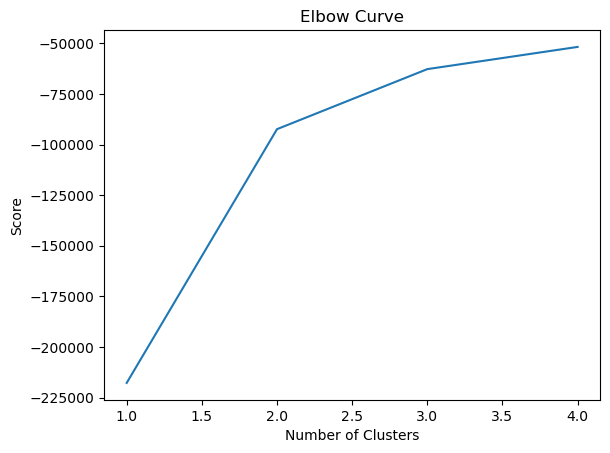

In [27]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# k-means clustering

In [33]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [34]:
# Fit the k-means object to the data.

kmeans.fit(df_sub)

/Users/amykillin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [36]:
df_sub['clusters'] = kmeans.fit_predict(df_sub)

/Users/amykillin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/4r/1lzl881j3rxcxvg9h9jmpg6r0000gn/T/ipykernel_51993/4169945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['clusters'] = kmeans.fit_predict(df_sub)


In [37]:
df_sub.head()

,knockdowns,takedowns_attempted,takedowns_secured,sub_attempted,reversals,clusters
0,0,1,0,0,0,0
1,2,5,2,3,1,2
2,0,0,0,0,0,0
3,4,5,4,2,4,2
4,3,5,3,0,1,2


In [38]:
df_sub['clusters'].value_counts()

0    3106
2    2045
1     861
Name: clusters, dtype: int64

In [56]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   knockdowns           6012 non-null   int64 
 1   takedowns_attempted  6012 non-null   int64 
 2   takedowns_secured    6012 non-null   int64 
 3   sub_attempted        6012 non-null   int64 
 4   reversals            6012 non-null   int64 
 5   clusters             6012 non-null   int32 
 6   cluster              6012 non-null   object
dtypes: int32(1), int64(5), object(1)
memory usage: 305.4+ KB


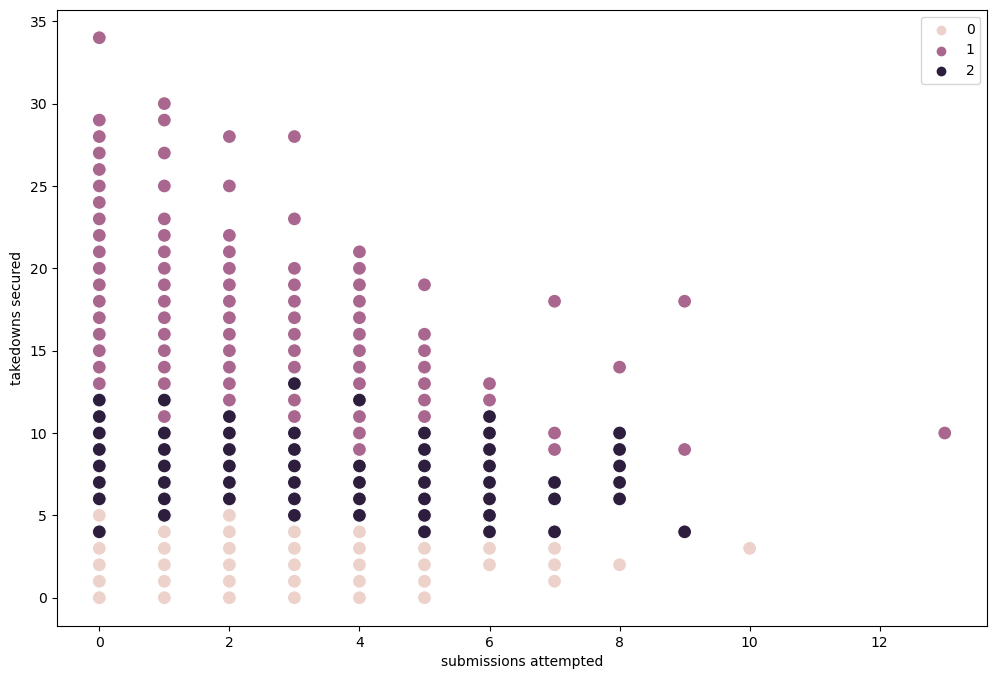

In [57]:
# Plot the clusters for the "takedowns_secured" and "sub_attempted" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['sub_attempted'], y=df['takedowns_attempted'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('submissions attempted') # Label x-axis.
plt.ylabel('takedowns secured') # Label y-axis.
plt.show()

In [49]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   knockdowns           6012 non-null   int64 
 1   takedowns_attempted  6012 non-null   int64 
 2   takedowns_secured    6012 non-null   int64 
 3   sub_attempted        6012 non-null   int64 
 4   reversals            6012 non-null   int64 
 5   clusters             6012 non-null   int32 
 6   cluster              6012 non-null   object
dtypes: int32(1), int64(5), object(1)
memory usage: 305.4+ KB


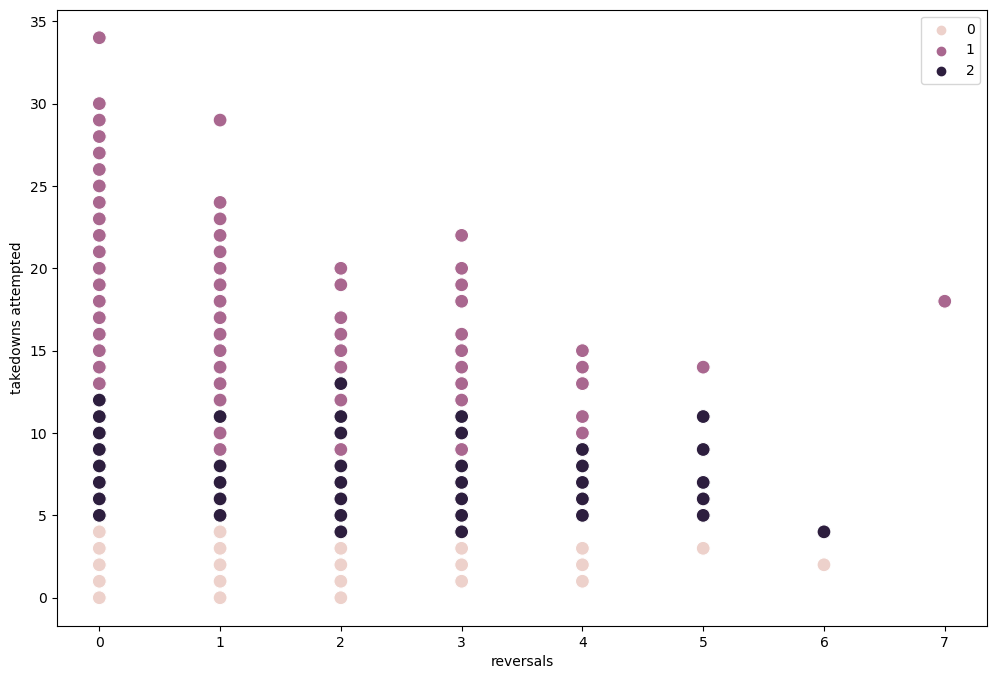

In [60]:
# Plot the clusters for the "takedowns_attempted" and "sub_attempted" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['reversals'], y=df['takedowns_attempted'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('reversals') 
plt.ylabel('takedowns attempted') 
plt.show()

In [61]:
df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'dark purple'
df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = 'purple'
df_sub.loc[df_sub['clusters'] == 0, 'cluster'] = 'pink'

In [62]:
df_sub.groupby('cluster').agg({'takedowns_secured':['mean', 'median'], 
                         'sub_attempted':['mean', 'median'], 
                         'takedowns_attempted':['mean', 'median'],
                          'reversals':['mean', 'median']})

takedowns_secured        sub_attempted        takedowns_attempted  \
                         mean median          mean median                mean   
cluster                                                                         
dark purple          2.869927    3.0      1.030807    1.0            7.464059   
pink                 0.698004    1.0      0.611719    0.0            1.875402   
purple               5.535424    5.0      1.108014    1.0           14.574913   

                   reversals         
            median      mean median  
cluster                              
dark purple    7.0  0.427873    0.0  
pink           2.0  0.113329    0.0  
purple        14.0  0.481998    0.0

In [63]:
# The purple has the best stats as it's the highest in all the categories
        # Median is 5, 1, 14 and 0
        # Most takedown attempts, most reversals, most takedowns secured, most submission attmepts.
# Followed by the dark purple
        # Represents the middle in all categories
# Lastly the pink
        # Represents the smaller volumes of all categories.

In [64]:
# Due to the low volums of numerical data (compared with, for example strikes)
# This is quite a rigid histogram-style visual
# Need more volume to give some chaos/ disorder from a visual perspective to then leverage the tools to see patterns 
# We humans can't depict, but the model can help with.

In [65]:
# For this analysis, the clusters were mostly just ranges on the y-axis.
# Which isn't overly useful for the purpose of this endeavour.